In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/potholes.zip"

Archive:  /content/gdrive/My Drive/potholes.zip
   creating: potholes/
  inflating: __MACOSX/._potholes     
   creating: potholes/potholes/
  inflating: potholes/.DS_Store      
  inflating: __MACOSX/potholes/._.DS_Store  
   creating: potholes/normal/
  inflating: potholes/potholes/63.jpg  
  inflating: __MACOSX/potholes/potholes/._63.jpg  
  inflating: potholes/potholes/189.jpg  
  inflating: __MACOSX/potholes/potholes/._189.jpg  
  inflating: potholes/potholes/77.jpg  
  inflating: __MACOSX/potholes/potholes/._77.jpg  
  inflating: potholes/potholes/162.jpg  
  inflating: __MACOSX/potholes/potholes/._162.jpg  
  inflating: potholes/potholes/176.jpg  
  inflating: __MACOSX/potholes/potholes/._176.jpg  
  inflating: potholes/potholes/88.jpg  
  inflating: __MACOSX/potholes/potholes/._88.jpg  
  inflating: potholes/potholes/228.jpg  
  inflating: __MACOSX/potholes/potholes/._228.jpg  
  inflating: potholes/potholes/214.jpg  
  inflating: __MACOSX/potholes/potholes/._214.jpg  
  inflat

In [3]:
dataset_dir = 'potholes/'

In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import clear_output

import tensorflow as tf
import keras
from keras.optimizers import SGD, Adam, Adadelta
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from keras.models import Sequential
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.1


In [5]:
dim1 = []
dim2 = []
for image_filename in os.listdir(dataset_dir+'/potholes'):
    
    img = mpimg.imread(dataset_dir+'/potholes'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

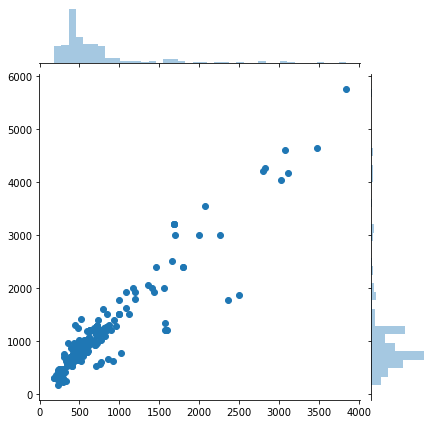

In [6]:
sns.jointplot(dim1,dim2)

In [7]:
print(np.mean(dim1))
print(np.mean(dim2))

665.8480243161094
1014.9118541033434


In [9]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('Log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="val_accuracy")
        ax2.legend()
        
        plt.show()
        
        
plot = PlotLearning()

In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5%
    rescale=1/255, # Rescale the image by normalzing it.
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allow horizontal flipping
    fill_mode='nearest', # Fill in missing pixels with the nearest filled value
    validation_split=0.2,
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset="training"
)

validation_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    subset="validation"
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()  # Summary of the model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

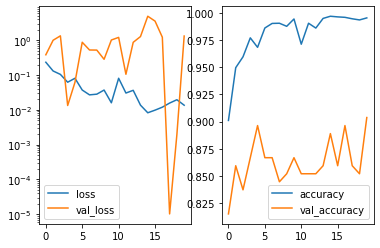

In [21]:
model_history = model.fit(train_gen, steps_per_epoch=562, epochs=20, validation_data=validation_gen, callbacks=[plot])

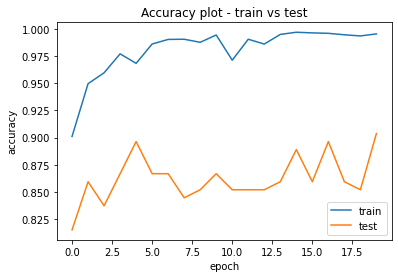

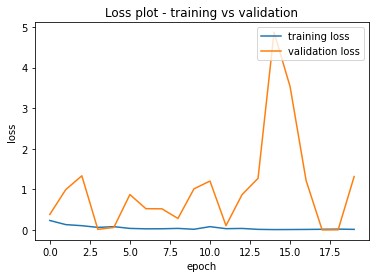

In [22]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('Loss plot - training vs validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
model.save('potholes.h5')

In [24]:
print (train_gen.class_indices)

labels = '\n'.join(sorted(train_gen.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'normal': 0, 'potholes': 1}


In [25]:
new_model= tf.keras.models.load_model(filepath="potholes.h5")
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("linear.tflite", "wb").write(tflite_model)

3255232

In [29]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(64, 64))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=32)
  
  print(classes)
  
  if classes[0]>0:
    print(fn + " is a pathole")
    
  else:
    print(fn + " is a normal")

Saving download.jpeg to download.jpeg
[[1.]]
download.jpeg is a pathole
